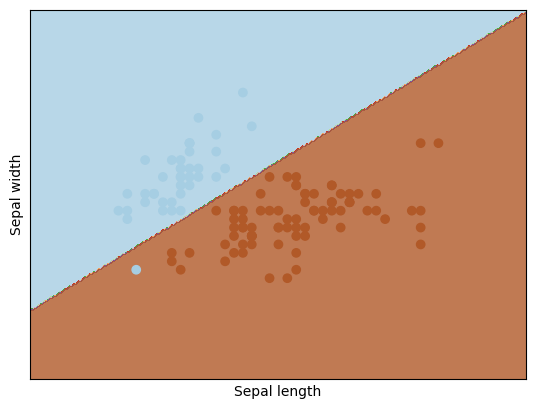

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=0.001, regularization=0.01, num_iterations=1000):
        self.lr = learning_rate
        self.reg = regularization
        self.num_iters = num_iterations
        self.w = None
        self.b = None
       
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
       
        for i in range(self.num_iters):
            margins = y * (np.dot(X, self.w) + self.b)
            hinge_loss = np.maximum(0, 1 - margins)
           
            dw = self.reg * self.w - np.dot(X.T, y * (hinge_loss > 0))
            db = -np.sum(y * (hinge_loss > 0))
           
            self.w -= self.lr * dw
            self.b -= self.lr * db
   
    def predict(self, X):
        scores = np.dot(X, self.w) + self.b
       
        return np.sign(scores)

iris = load_iris()
X = iris.data[:, :2]  # Select only the first two features
y = np.where(iris.target == 0, -1, 1)  # Convert labels to -1 or 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm = SVM()
svm.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()
